<a href="https://colab.research.google.com/github/abh22/camp_recruit/blob/main/Campus_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data?select=Placement_Data_Full_Class.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farahabdelhedi
Your Kaggle Key: ··········


100%|██████████| 4.51k/4.51k [00:00<00:00, 6.92MB/s]

In [3]:
import pandas as pd

df = pd.read_csv('/content/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
df.isnull().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [6]:
df.shape

(215, 15)

In [7]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [8]:
df.drop(columns='sl_no',inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
df.duplicated().any()

False

In [10]:
# @title Data viz
import seaborn as sns

<Axes: xlabel='gender', ylabel='count'>

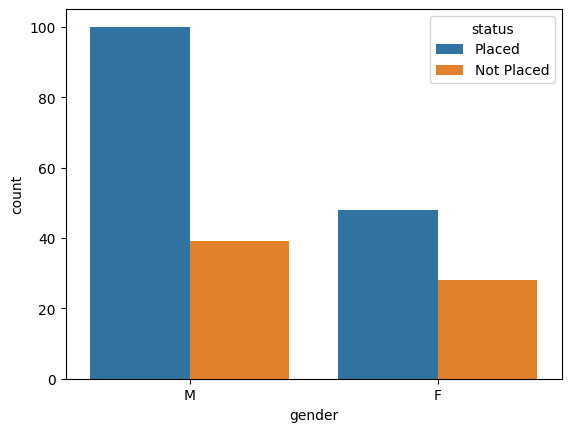

In [11]:
sns.countplot(x='gender', hue='status', data=df)



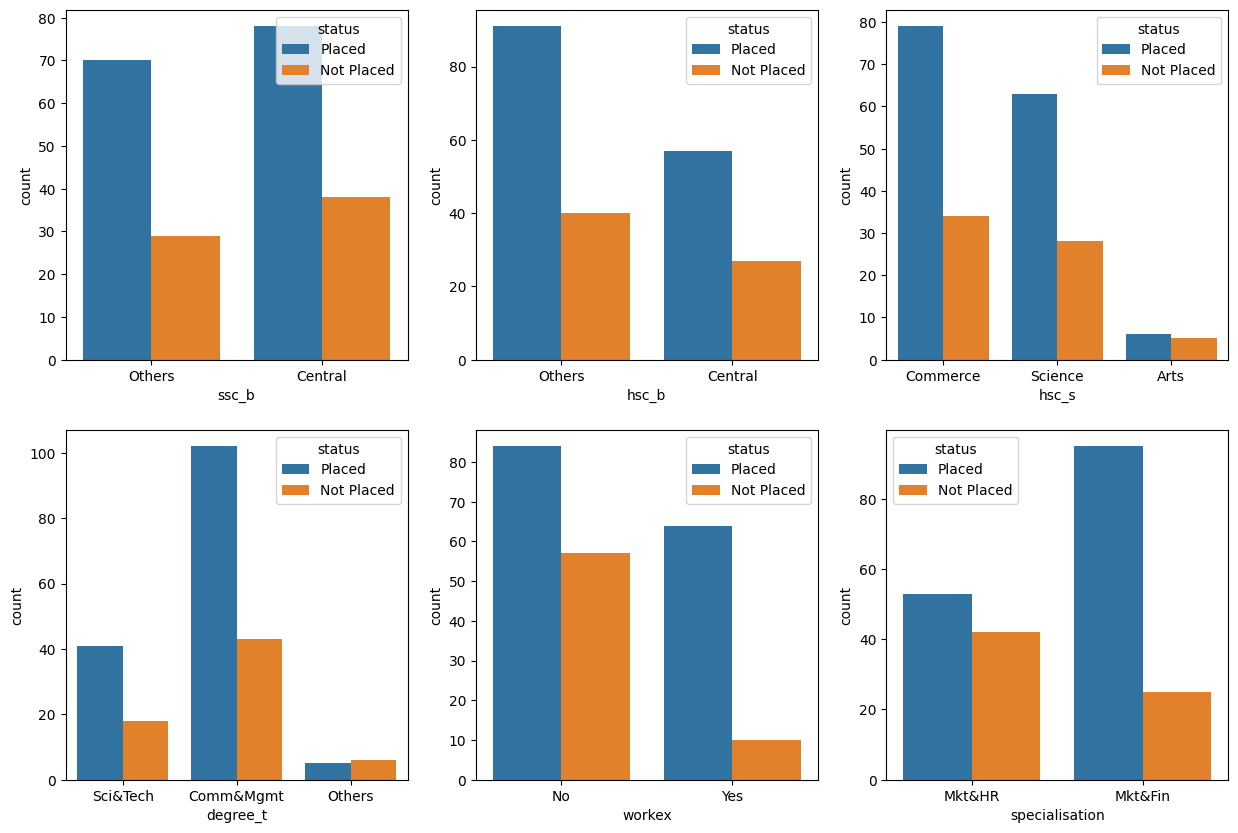

In [12]:
import matplotlib.pyplot as plt

categ= [ 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()
for i,elem in enumerate(categ):
  sns.countplot(x=elem, hue='status', data=df,ax=axs[i])
plt.show()


<ipython-input-13-3139c2f01c37>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.salary)


<Axes: xlabel='salary', ylabel='Density'>

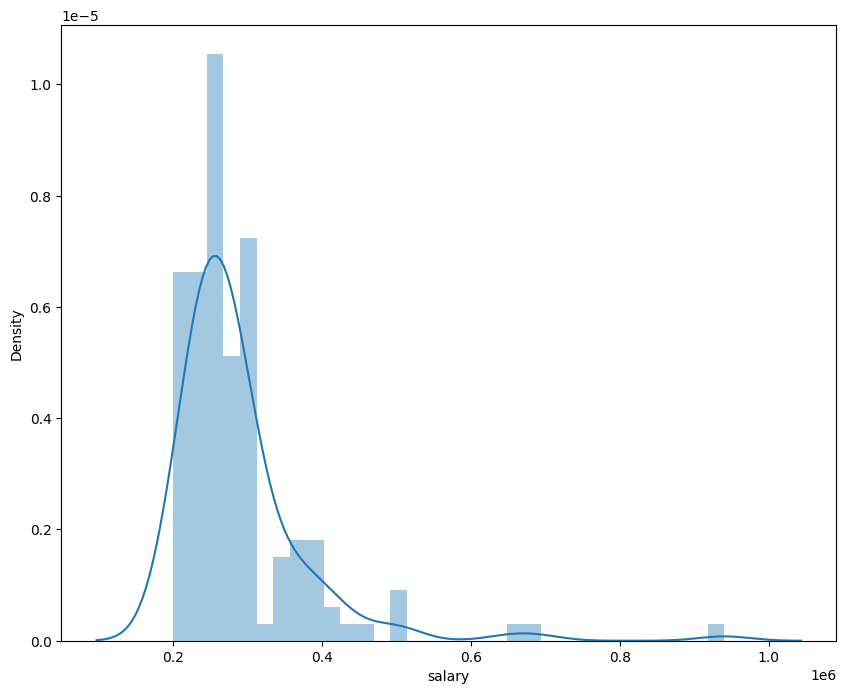

In [13]:
# @title Filling missing values
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df.salary)

In [14]:
df.salary.nunique()


45

In [15]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [16]:
df['salary']=df['salary'].fillna(df['salary'].median())
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [17]:
# @title Label encoding
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col]=label_encoder.transform(df[col])



In [18]:
 df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


<Axes: >

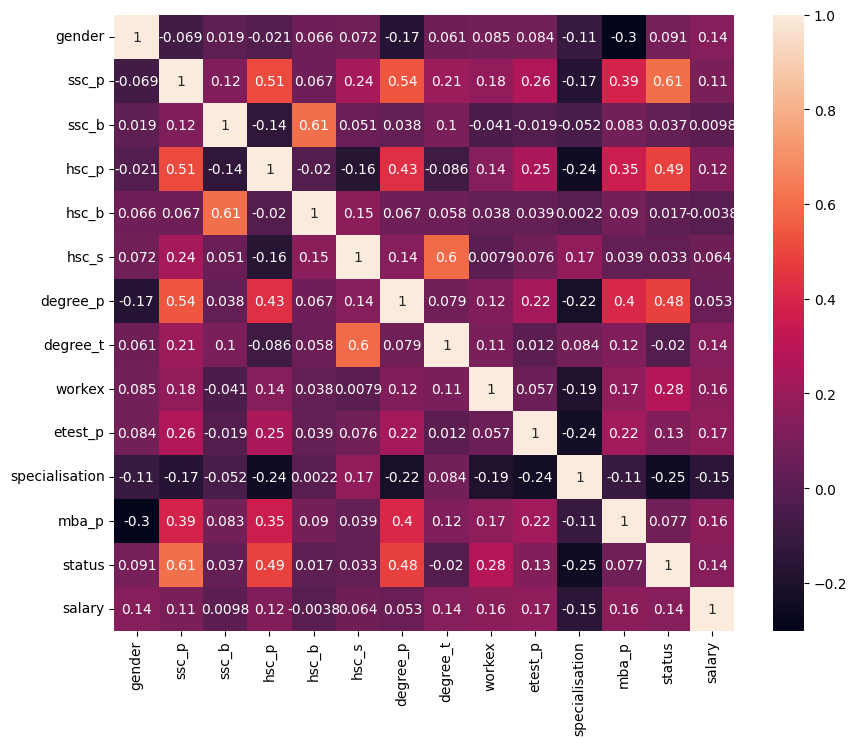

In [19]:
# @title Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),fmt='.2g', annot=True)


In [20]:
from sklearn.model_selection import train_test_split
X=df.drop('status', axis=1)
Y=df['status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [21]:
# @title Removing outliers
from scipy import stats
import numpy as np
selected_columns=['hsc_p','degree_p','ssc_p']
#calculating z_score for those features
z_scores=np.abs(stats.zscore(X_train[selected_columns]))
threshold=3
#getting the outliers
outlier_indices=np.where(z_scores>threshold)[0]
#removing the outliers
X_train=X_train.drop(X_train.index[outlier_indices])
Y_train=Y_train.drop(Y_train.index[outlier_indices])

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree= DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]

}
grid_search= GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [26]:
dtree=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=3,min_samples_split=2,class_weight='balanced')
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [28]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
Y_pred=dtree.predict(X_test)
print("Accuracy score:", round(accuracy_score(Y_test,Y_pred)*100 ,2), "%")

Accuracy score: 86.05 %
